<a href="https://colab.research.google.com/github/toche7/MLandAI/blob/main/Lab4_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4: Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [79]:
df= pd.read_csv("https://github.com/toche7/DataSets/raw/main/apple.csv")
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [ ]:
df = pd.read_csv("/content/apples_and_oranges_Train.csv")
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


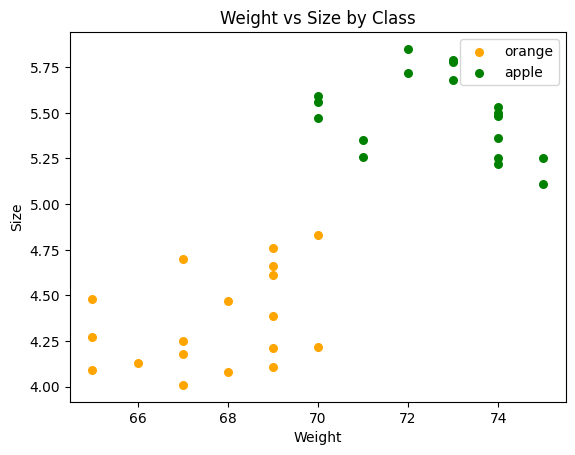

In [ ]:
classes = df['Class'].unique()

# Color map (you can customize this as needed)
color_map = {'orange': 'orange', 'apple': 'green'}

# Plotting
ax = plt.gca()  # Get current axes

for fruit_class in classes:
    df_subset = df[df['Class'] == fruit_class]
    df_subset.plot.scatter(x='Weight', y='Size', ax=ax, color=color_map[fruit_class], label=fruit_class, s=30)

plt.title('Weight vs Size by Class')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.show()

In [27]:
X = df[['Weight','Size']]

In [28]:
y = df[['Class']]

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lgModel = LogisticRegression();

In [29]:
lgModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
lgModel.predict(X)

array(['orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'apple',
       'apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'orange',
       'apple', 'orange', 'orange', 'apple', 'orange', 'apple', 'orange',
       'orange', 'orange', 'orange', 'orange', 'apple', 'orange',
       'orange', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange',
       'apple', 'apple'], dtype=object)

In [31]:
lgModel.score(X,y)

1.0

In [32]:
lgModel.coef_

array([[-1.3660693 , -1.32978145]])

In [33]:
lgModel.intercept_

array([102.32795472])

In [34]:
from joblib import load, dump

In [35]:
dump(lgModel, 'lgModel.joblib')

['lgModel.joblib']

In [36]:
ls

apples_and_oranges_Train.csv  lgModel.joblib  sample_data/


In [38]:
ldModel = load('/content/lgModel.joblib')

In [39]:
ldModel.score(X,y)

1.0

In [46]:
np.dot(X,np.transpose(ldModel.coef_)) + ldModel.intercept_

array([[ 2.23143248],
       [ 2.47079314],
       [ 8.09464411],
       [-3.80825633],
       [ 4.55133883],
       [-4.94826279],
       [-0.69048112],
       [-6.92242596],
       [-5.88880202],
       [ 7.85528345],
       [-5.09453875],
       [-0.57080078],
       [-6.11486487],
       [ 3.49111926],
       [-5.70263262],
       [ 7.57602935],
       [ 1.87239149],
       [-7.10859536],
       [ 5.24282518],
       [-6.07497143],
       [ 6.67538355],
       [ 0.28025934],
       [ 1.93888056],
       [ 4.00973403],
       [ 5.14974048],
       [-1.77729631],
       [ 5.46888803],
       [ 1.09142603],
       [-5.74252607],
       [-1.65761598],
       [-5.08124093],
       [-3.63538475],
       [ 2.60377128],
       [ 1.73941334],
       [-6.0483758 ],
       [-0.73037456]])

In [50]:
ldModel.coef_[0,1]

-1.3297814482579002

In [74]:
x1 = np.arange(69,72)
x2 = (-x1*ldModel.coef_[0,0] - ldModel.intercept_)/ldModel.coef_[0,1]

In [75]:
x2

array([6.06804453, 5.04075594, 4.01346736])

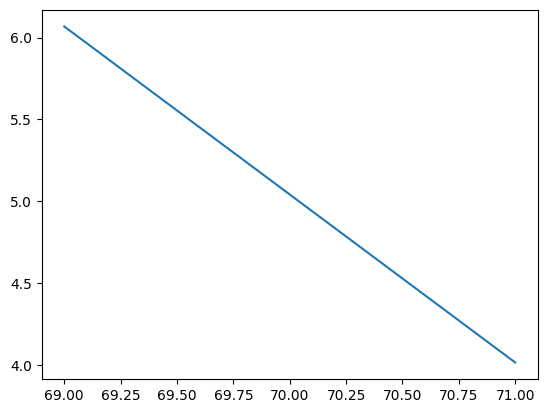

In [76]:
plt.plot(x1, x2)

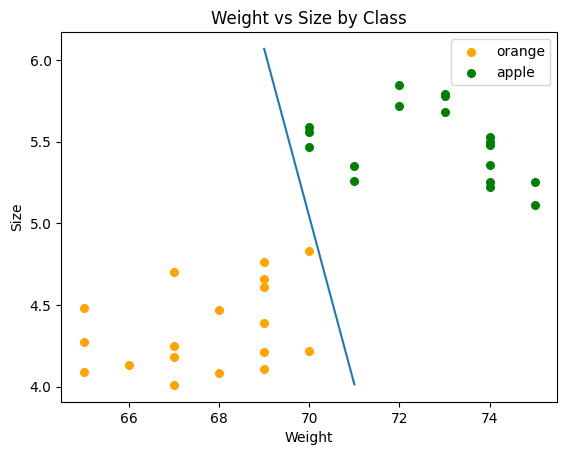

In [77]:
# Plotting
ax = plt.gca()  # Get current axes

for fruit_class in classes:
    df_subset = df[df['Class'] == fruit_class]
    df_subset.plot.scatter(x='Weight', y='Size', ax=ax, color=color_map[fruit_class], label=fruit_class, s=30)

plt.plot(x1, x2)
plt.title('Weight vs Size by Class')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()
plt.show()